# Algoritmos de aprendizaje automático para la detección y/o prevención Fraudes

## Projecto Semana i Octubre 2019.


#### Gerardo Anglada
#### Rodrigo Sibaja
#### José Núñez


# Contenido

Este dataset contiene transacciones hechas por tarjeta de crédito en el mes de septiembre 2013 por tarjetahabientes europeos. Estaremos utilizando datos de un plazo de dos días.


## Importaciones

Las librerías necesarias para que funcione el programa:

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns

ModuleNotFoundError: No module named 'imblearn'

In [5]:
# Definir la carpeta donde tenemos los dataset y luego cargaremos los datos a analizar

# MODIFICAR RUTA A ARCHIVO
os.chdir("/Users/gerangmac/Desktop/Jupyter/lavadero")

df = pd.read_csv(r'creditcard.csv')

### Imprimiremos datos para visualizar nuestro dataset:

In [6]:
# Mostrar la dimensión del dataset
print('Este dataframe tiene {} filas y {} columnas.'.format(df.shape[0], df.shape[1]))
print()

# Mostrar 5 registros del dataset para visualizar
print(df.sample(5))
print()

# Identificar si está balanceado
print('Identificar si está balanceado [0 = No fraude; 1 = Fraude]')
occ = df['Class'].value_counts()
print(occ)
print()

Este dataframe tiene 284807 filas y 31 columnas.

            Time        V1        V2        V3        V4        V5        V6  \
120529   75859.0 -1.572170  0.334418 -0.057449 -1.856147  1.389948  3.694756   
39897    40014.0 -1.863800 -0.945104 -0.352034 -0.813730  3.567558  2.740789   
5833      6309.0 -1.121387 -0.675895  1.997159  2.175228 -1.506406  1.054871   
180673  124651.0 -0.535421  0.709337  0.289811 -1.193502  0.285858  0.209886   
6948      9029.0 -0.864907  1.282923  2.362263  1.473443  1.235873 -0.570134   

              V7        V8        V9  ...       V21       V22       V23  \
120529 -1.202026  1.943936  0.256059  ... -0.091494 -0.593794 -0.115178   
39897   0.115665  0.556389 -0.090324  ... -0.431668 -0.369302  1.243692   
5833    1.708158 -0.007519  1.147254  ...  0.183512  0.021971  1.206216   
180673 -0.082101  0.675981  0.381685  ...  0.064480 -0.003652  0.242427   
6948    1.666997 -0.943390  0.302327  ... -0.299083 -0.252069 -0.539502   

             V24  

Como aparece previamente:
#### 0:     284,315
#### 1:      492
 **NO ESTÁ BALANCEADO**



## Diagramas para interpretar dataset
              [1] Se creará diagrama de dispersión de datos.
              [2] Se realizará un remuestreo con la función de SMOTE.
              [3] Gráficas para comparar datos original y remuestreados.

In [7]:
counts = df.Class.value_counts()
normal = counts[0]
fraudes = counts[1]
porc_normal = (normal/(normal+fraudes))*100
porc_fraudes = (fraudes/(normal+fraudes))*100
print('Dentro del dataset se encuentran {} transacciones no fraudulentas ({:.3f}%) y {} transacciones fraudulentas ({:.3f}%).'.format(normal, porc_normal, fraudes, porc_fraudes))

plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Transacciones Fraudulentas vs. No Fraudulentas')
plt.ylabel('Transacciones')
plt.xlabel('(0: No fraude; 1: Fraude)')

Dentro del dataset se encuentran 284315 transacciones no fraudulentas (99.827%) y 492 transacciones fraudulentas (0.173%).


NameError: name 'sns' is not defined

<Figure size 576x432 with 0 Axes>

In [5]:
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label = "Class #0", alpha = 0.5, linewidth = 0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label = "Class #1", alpha = 0.5, linewidth = 0.15, c = 'r')
    plt.legend()
    return plt.show()

# Función que crea conjunto de caracteristicas X y etiquetas y
def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 29]
    y = np.array(y).astype(np.float)
    return X, y


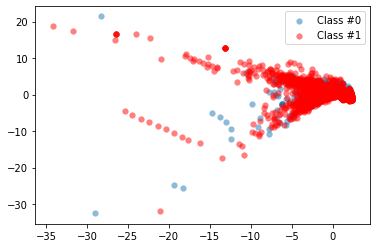

In [6]:
# Crear variables X y y
X, y = prep_data(df)
plot_data(X, y)

### Para hacer el remuestreo para balancear, quitaremos una columna que no requerimos.

In [7]:
df = df.drop(['Amount'], axis = 1)

X, y = prep_data(df)

In [8]:
# Método de resampling
method = SMOTE(kind = 'regular')

In [9]:
# Se crean conjuntos de características remuestreadas
X_resampled, y_resampled = method.fit_sample(X, y)

# Se grafican datos (Más de 5 minutos)
# plot_data(X_resampled, y_resampled)

Valores originales de y
0.0    284315
1.0       492
dtype: int64

Valores remuestreados de y
1.0    284315
0.0    284315
dtype: int64



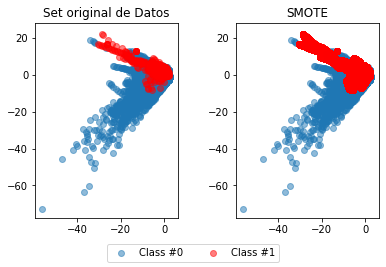

In [10]:
def compare_plot(X, y, X_resampled, y_resampled, method):
    # Inicia el gráfico plot
    f, (ax1, ax2) = plt.subplots(1, 2)
    
    # Subplot 1, con datos normales
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label = "Class #0", alpha = 0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label = "Class #1", alpha = 0.5, c = 'r')
    ax1.set_title('Set original de Datos')
    
    # Subplot 2, con datos remuestrados
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label = "Class #0", alpha = 0.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label = "Class #1", alpha = 0.5, c = 'r')
    ax2.set_title(method)
    
    # Se agregan algunos parámetros
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc = 'lower center', ncol = 2, labelspacing = 0.1)
                  
    plt.tight_layout(pad = 3)
                  
    return plt.show()
                     
# Imprime el value_counts originales de y.
print("Valores originales de y")
print(pd.value_counts(pd.Series(y)))
print()

# Imprime el value_counts remuestreados de y.
print("Valores remuestreados de y")
print(pd.value_counts(pd.Series(y_resampled)))
print()
              
# Se ejecuta comparación de gráficas.
compare_plot(X, y, X_resampled, y_resampled, method = 'SMOTE')

# Se obtiene la media de cada grupo.
df.groupby('Class').mean()

# Se implementa una regla para indicar en que casos se marcará como fraude.
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)


## Datos después del remuestreo.

Text(0.5, 0, '(0: No fraude; 1: Fraude)')

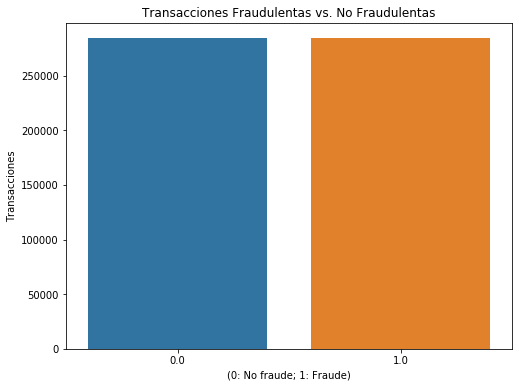

In [11]:
sub_counts = pd.value_counts(pd.Series(y_resampled))
normal = sub_counts[0]
fraudes = sub_counts[1]

plt.figure(figsize=(8,6))
sns.barplot(x=sub_counts.index, y=sub_counts)
plt.title('Transacciones Fraudulentas vs. No Fraudulentas')
plt.ylabel('Transacciones')
plt.xlabel('(0: No fraude; 1: Fraude)')

Ahora, creamos una tabla de referencias cruzadas de casos de fraude marcados frente a los casos de fraude reales.
Haremos una matriz de confusión.

Recordando que previamente se tenían 50 casos marcados como fraude.          

In [12]:
occ = df['Class'].value_counts()
print(occ)

print()
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames = ['Fraude Real'], colnames = ['Macado como Fraude']))

0    284315
1       492
Name: Class, dtype: int64

Macado como Fraude       0     1
Fraude Real                     
0                   283089  1226
1                      322   170


# Algoritmos de clasificación

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def reports(model, X_test, X_train, y_test, y_train):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    
    print('Reporte Clasificación')
    print(classification_report(y_test, predicted))
    
    print('Matriz Confusión')
    print(confusion_matrix(y_true = y_test, y_pred = predicted))
    print()
    
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
        

In [14]:
models = []
models.append(('Reg_Log', LogisticRegression()))
models.append(('Arbol_Dec', DecisionTreeClassifier()))
models.append(('Bosque_Al', RandomForestClassifier()))

# probando modelos
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print()
    print('{}: {:2.3%} ({:2.3%})'.format(name, cv_results.mean(), cv_results.std()))
    reports(model, X_test, X_train, y_test, y_train)



Reg_Log: 96.970% (2.183%)
Reporte Clasificación
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    142158
         1.0       0.89      0.61      0.72       246

    accuracy                           1.00    142404
   macro avg       0.95      0.80      0.86    142404
weighted avg       1.00      1.00      1.00    142404

Matriz Confusión
[[142140     18]
 [    97    149]]


Arbol_Dec: 87.277% (3.459%)
Reporte Clasificación
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    142158
         1.0       0.77      0.75      0.76       246

    accuracy                           1.00    142404
   macro avg       0.88      0.88      0.88    142404
weighted avg       1.00      1.00      1.00    142404

Matriz Confusión
[[142102     56]
 [    61    185]]



/Users/gerangair/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gerangair/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gerangair/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gerangair/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gerangair/anaconda3/l


Bosque_Al: 92.653% (3.434%)


/Users/gerangair/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Reporte Clasificación
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    142158
         1.0       0.95      0.76      0.84       246

    accuracy                           1.00    142404
   macro avg       0.97      0.88      0.92    142404
weighted avg       1.00      1.00      1.00    142404

Matriz Confusión
[[142148     10]
 [    60    186]]



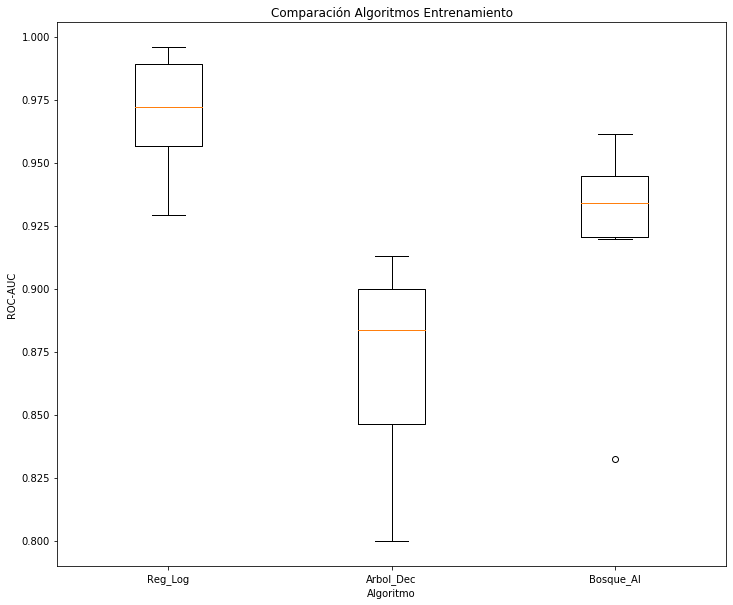

In [15]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparación Algoritmos Entrenamiento')
plt.xlabel('Algoritmo')
plt.ylabel('ROC-AUC')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()